<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [2]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-03-24 14:22:15--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.4’

survey-results-publ 100%[===================>] 201.62M  67.3MB/s    in 3.0s    

2025-03-24 14:22:20 (67.3 MB/s) - ‘survey-results-public.sqlite.4’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [3]:
!pip install pandas

In [4]:
!pip install matplotlib

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


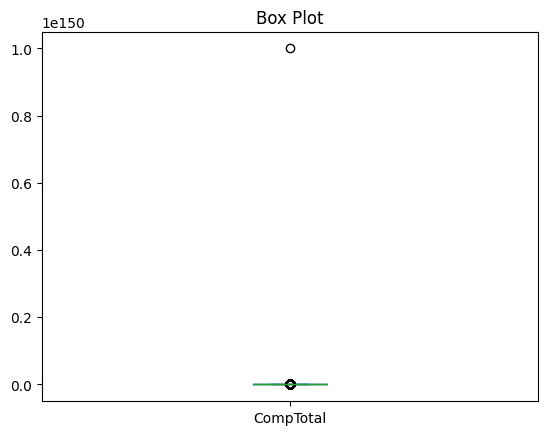

In [9]:
# your code goes here

QUERY = """
SELECT CompTotal
FROM main 
"""
df_CompTotal = pd.read_sql_query(QUERY, conn)
df_CompTotal.head()

df_CompTotal.plot(kind='box')
plt.title('Box Plot')
plt.show()




**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


/tmp/ipykernel_2040/1948631223.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].replace({
/tmp/ipykernel_2040/1948631223.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age'] = pd.to_numeric(df_cleaned['Age'], errors='coerce')


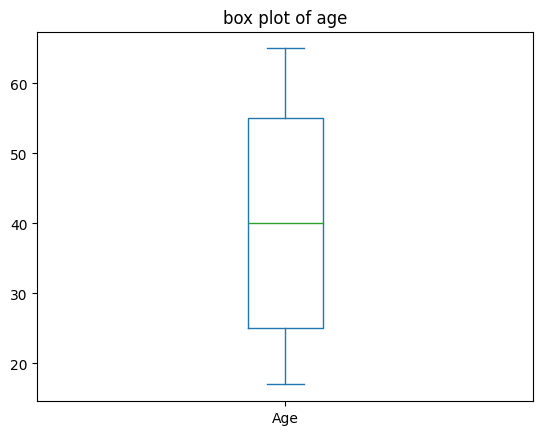

In [10]:
# your code goes here

# Create a connection to your SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# SQL query
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""

# Load the data into pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Map the Age column values to specific numeric values
df['Age'].replace({
    '25-34 years old': 30,
    '35-44 years old': 40,
    '18-24 years old': 20,
    '45-54 years old': 50,
    '55-64 years old': 60,
    'Under 18 years old': 17,
    '65 years or older': 65
}, inplace=True)

# Remove rows with 'Prefer not to say' in 'Age' column
df_cleaned = df[~df['Age'].isin(['Prefer not to say'])]

# Convert 'Age' column to numeric values 
df_cleaned['Age'] = pd.to_numeric(df_cleaned['Age'], errors='coerce')

df_cleaned['Age'].plot(kind='box')
plt.title('box plot of age')
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


   CompTotal              Age  count
0        NaN  25-34 years old   9254
1        0.0  25-34 years old     33
2        1.0  25-34 years old      4
3        4.0  25-34 years old      1
4        5.0  25-34 years old      5


/tmp/ipykernel_2040/1466735573.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].replace({
/tmp/ipykernel_2040/1466735573.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Age'].replace({


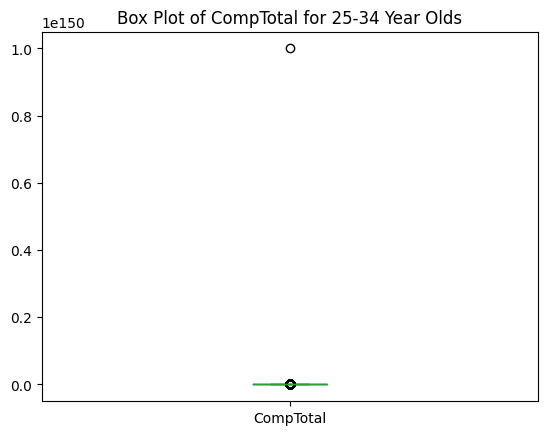

In [20]:
# your code goes here

# I'll pick the 25-34 years old age group as an example.

# Create a connection to your SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Corrected SQL query to get data for Age = '25-34 years old'
QUERY = """
SELECT CompTotal, Age, COUNT(*) as count
FROM main
WHERE Age = '25-34 years old'
GROUP BY CompTotal, Age
"""

# Load the data into pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Check the data
print(df.head())

#  map the 'Age' column
df['Age'].replace({
    '25-34 years old': 30,
}, inplace=True)

# Convert 'Age' and 'CompTotal' columns to numeric values
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Plotting the boxplot for 'CompTotal'
df['CompTotal'].plot(kind='box')
plt.title('Box Plot of CompTotal for 25-34 Year Olds')
plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


In [12]:
# your code goes here


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


In [13]:
# your code goes here



**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


   CompTotal                                            Country
0   110000.0                           United States of America
1    27000.0                                            Germany
2   126420.0  United Kingdom of Great Britain and Northern I...
3    50000.0                                            Ukraine
4  1100000.0                                              India


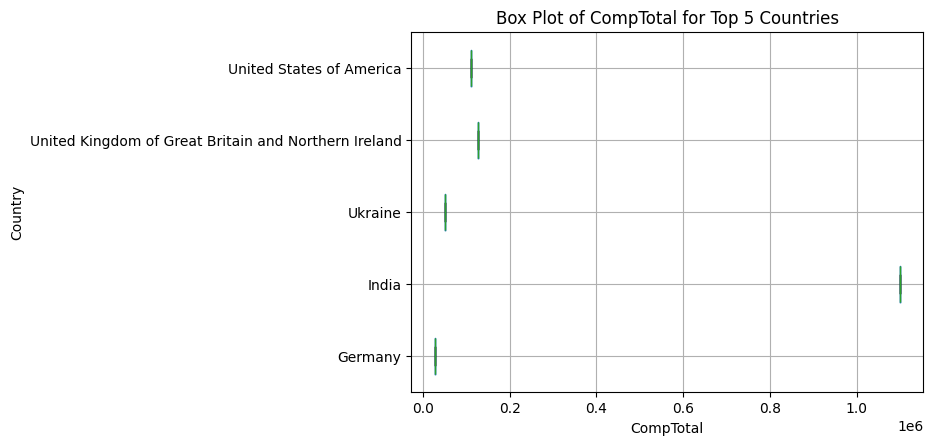

In [21]:
# your code goes here


# Create a connection to your SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Corrected SQL query to get the top 5 countries by the number of rows
QUERY = """
SELECT CompTotal, Country
FROM main
WHERE Country IS NOT NULL AND CompTotal IS NOT NULL
GROUP BY Country
ORDER BY COUNT(*) DESC
LIMIT 5
"""

# Load the data into pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Check the data
print(df.head())

# Convert 'CompTotal' column to numeric values
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Plotting the boxplot for 'CompTotal' for the top 5 countries
df.boxplot(column='CompTotal', by='Country', vert=False)
plt.title('Box Plot of CompTotal for Top 5 Countries')
plt.suptitle('')  # This removes the default title 'Boxplot'
plt.xlabel('CompTotal')
plt.ylabel('Country')
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


In [15]:
# your code goes here

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [16]:
# your code goes here

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [17]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
